In [1]:
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from data import *

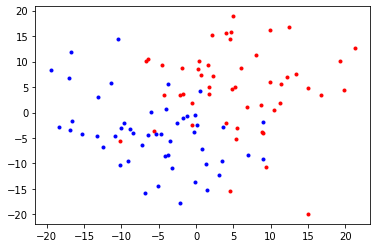

In [3]:
plt.plot(X[2,:], X[30,:], 'r.')
plt.plot(Y[2,:], Y[30,:], 'b.')
plt.show()

In [4]:
lambd = cp.Variable(shape=(100,))
gamma = cp.Variable(shape=(100,))

X2 = X[[2, 30], :]
Y2 = Y[[2, 30], :]

M = np.concatenate((X[[2, 30], :], -Y[[2, 30], :]), axis=1)
D = M.T @ M + np.eye(M.shape[1]) * 1e-5

In [5]:
print(D.shape)
print(M.shape)
print(np.all(np.linalg.eigvals(D) >= 0))
print(np.linalg.eigvals(D))

(100, 100)
(2, 100)
True
[9.15580702e+03+0.00000000e+00j 6.29310300e+03+0.00000000e+00j
 1.00000004e-05+0.00000000e+00j 9.99999977e-06+2.50241262e-14j
 9.99999977e-06-2.50241262e-14j 1.00000002e-05+0.00000000e+00j
 1.00000001e-05+2.46597432e-14j 1.00000001e-05-2.46597432e-14j
 9.99999982e-06+0.00000000e+00j 1.00000001e-05+1.27463938e-14j
 1.00000001e-05-1.27463938e-14j 9.99999985e-06+0.00000000e+00j
 9.99999986e-06+0.00000000e+00j 9.99999989e-06+0.00000000e+00j
 9.99999990e-06+2.20243461e-14j 9.99999990e-06-2.20243461e-14j
 9.99999989e-06+0.00000000e+00j 1.00000001e-05+0.00000000e+00j
 1.00000001e-05+0.00000000e+00j 1.00000001e-05+0.00000000e+00j
 1.00000000e-05+4.89646220e-14j 1.00000000e-05-4.89646220e-14j
 9.99999991e-06+9.00691390e-15j 9.99999991e-06-9.00691390e-15j
 1.00000001e-05+1.29077534e-14j 1.00000001e-05-1.29077534e-14j
 9.99999994e-06+2.68412303e-14j 9.99999994e-06-2.68412303e-14j
 1.00000001e-05+7.82048307e-15j 1.00000001e-05-7.82048307e-15j
 9.99999997e-06+4.74517715e-14

In [25]:
k = 3
C = 0.1
objective = cp.Minimize( -cp.sum(lambd) + 0.5*cp.quad_form(lambd, D) + (lambd[0]+gamma[0])**(k/(k-1))/(k * C)**(k/(k-1)) * (1-1/k))

constraints= [lambd >= 0, cp.sum(lambd[0:50] - lambd[50:100]) == 0, lambd <= (lambd[0]+gamma[0]), lambd+gamma==C*np.ones(100)]
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.ECOS, verbose=False)

-3.272306203185645

In [36]:
np.argpartition(lambd.value, 2)[0]

49

In [27]:
gamma.value + lambd.value

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [28]:
w = np.sum(np.multiply(lambd.value,M), axis=1)

In [29]:
print(w.shape)
print(M[:, 23].shape)

(2, 1)
(2, 1)


In [30]:
index = np.argmax(lambd.value)

In [48]:
lamb_round = np.round(lambd.value, 3)
for i in range(len(lamb_round)):
    if lamb_round[i] != 0.1 and lamb_round[i] > 0:
        print(i)
        print(1 - (w.T@M[:,i])[0,0])

18
0.08308622633888185
34
0.08311201885247155
51
-0.08306835744662422


In [50]:
print(np.round(lambd.value, 3))

[0.    0.1   0.1   0.    0.    0.    0.1   0.    0.    0.    0.    0.1
 0.    0.    0.    0.    0.    0.1   0.008 0.    0.    0.1   0.    0.1
 0.1   0.    0.    0.    0.1   0.    0.    0.1   0.    0.1   0.005 0.1
 0.1   0.    0.    0.1   0.    0.1   0.    0.    0.    0.1   0.    0.
 0.1   0.    0.1   0.012 0.    0.    0.    0.1   0.1   0.    0.1   0.
 0.1   0.    0.    0.    0.1   0.    0.1   0.    0.    0.1   0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.1   0.1   0.1   0.    0.
 0.1   0.    0.1   0.    0.    0.    0.    0.    0.    0.    0.1   0.1
 0.1   0.1   0.    0.   ]


In [51]:
print(M[:, 51])

[[11.4]
 [-5.8]]


In [31]:
np.where(lambd.value <= 0.1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)

In [40]:
b = 1 - (w.T@M[:,51])[0,0]
print(b)

-0.08306835744662422


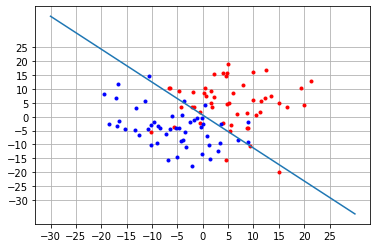

In [42]:
# i1 = 0
# i2 = 2
# plt.plot(X[i1,:], X[i2,:], 'r.')
# plt.plot(Y[i1,:], Y[i2,:], 'b.')
# x = np.linspace(-10, 0, 100)
# y = -(w[i1, 0]*x + b)/w[i2, 0]
# plt.plot(x, y)
# plt.show()
i1 = 0
i2 = 1
plt.plot(X2[i1,:], X2[i2,:], 'r.')
plt.plot(Y2[i1,:], Y2[i2,:], 'b.')
x = np.linspace(-30, 30, 100)
y = -(w[i1,0]*x + b)/w[i2,0]


# print(y)
plt.plot(x, y)
plt.grid()
plt.xticks(np.arange(-30, 30, 5))
plt.yticks(np.arange(-30, 30, 5))
plt.show()

In [152]:
print((w[i1,0]*X2[i1,:] + w[i2,0]*X2[i2,:] + b))#/np.linalg.norm(w))
print((w[i1,0]*Y2[i1,:] + w[i2,0]*Y2[i2,:] + b))#/np.linalg.norm(w))

[[2.92635214 2.09649283 2.13406455 2.67308504 1.7849942  2.99729392
  3.9687024  3.21531071 3.02094093 3.06049967 2.68479881 3.54537537
  2.10146631 2.70899744 3.16425988 2.64899614 2.75817024 3.29000855
  1.90687559 3.04668766 2.92126893 3.13530946 3.98936666 1.86963751
  3.47056632 2.44247069 3.93853604 2.91386654 2.47827337 1.86819989
  3.40714036 2.59628822 2.18246403 3.13707701 3.31045186 2.32987046
  1.         3.70062756 2.14776682 2.95718208 3.25255027 4.13069637
  3.98361987 3.0669078  3.07707571 1.39713768 2.17848481 3.30150137
  2.73894434 3.6770925 ]]
[[-1.7719052  -2.2944616  -2.44684151 -2.62828232 -2.88718648 -1.25730354
  -2.9439826  -2.73701601 -3.08188767 -1.68195699 -1.56714731 -2.44407896
  -1.84494595 -1.48681316 -1.4463699  -3.61615637 -2.34142421 -1.37454509
  -1.19431874 -1.89975357 -2.3729155  -1.9502513  -1.47819409 -2.34893781
  -2.14208095 -2.28562159 -2.04428846 -1.84428163 -2.11754942 -1.92726786
  -1.65919449 -1.84881248 -2.02008835 -1.96373337 -2.1782150

In [153]:
print(1/np.linalg.norm(w))

9.512873162083164
